In [1]:
# import requests
# import os

# # 모델의 raw URL을 사용합니다.
# url = 'https://github.com/NostalgicJ/Quantum_2023/raw/test/RNN_Practice/10/saved_models/NVspin_SimpleRNN_model.h5'
# response = requests.get(url, allow_redirects=True)

# # 현재 코드 파일이 위치한 디렉토리의 상위 디렉토리로 이동
# parent_directory = os.path.join(os.getcwd(), '..')

# # 상위 디렉토리에 새로운 디렉토리 생성
# new_directory = os.path.join(parent_directory, 'using_models')

# if not os.path.exists(new_directory):
#     os.makedirs(new_directory)

# # 모델 저장하기
# with open('../using_models/NVspin_SimpleRNN_model.h5', 'wb') as f:
#     f.write(response.content)
    

In [1]:
from tensorflow.keras.models import load_model

loaded_model = load_model('saved_models/NVspin_GRU_model.h5')

2023-08-31 17:29:37.266267: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 17:29:37.295816: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 17:29:37.296693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 17:29:37.911429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-31 17:29:38.565997: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-31 17:29:38.566404: W tensorflow/core/common_r

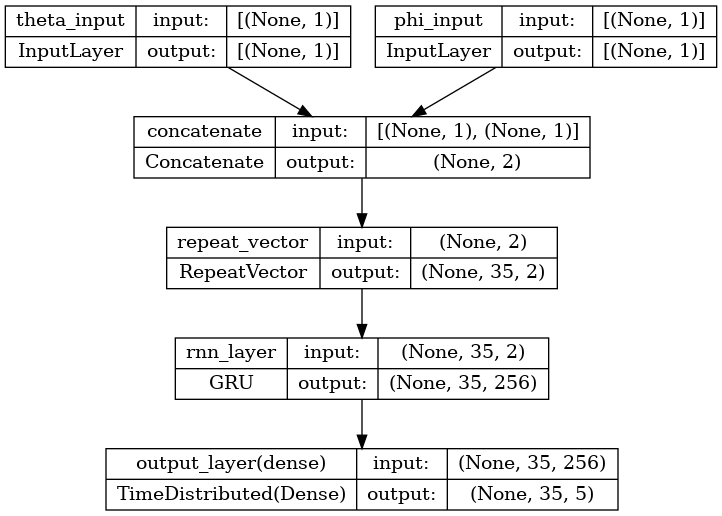

In [2]:
from tensorflow.keras.utils import plot_model
import os

# 저장할 디렉토리 생성
model_dir = 'model_plot'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# 원하는 디렉토리 지정
file_name = 'GRU_model_plot.png'
full_path = os.path.join(model_dir, file_name)

# 모델 구조 시각화
plot_model(loaded_model, to_file=full_path, show_shapes=True, show_layer_names=True)


In [4]:
import numpy as np

# 새로운 theta와 phi 값 정의
new_theta = np.array([np.pi/2]).reshape(-1, 1)  # 예시 값
new_phi = np.array([np.pi]).reshape(-1, 1)    # 예시 값

# 모델로 예측
predicted_sequence = loaded_model.predict([new_theta, new_phi])

# 결과 출력 (예측값은 확률 분포로 나올 것이므로 가장 높은 확률을 가진 인덱스를 선택)
predicted_sequence_indices = np.argmax(predicted_sequence, axis=-1)
print(predicted_sequence_indices[0])

1/1 [==============================] - 0s 243ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 2 4 4 1 1 3 3 2 2 4 4 1 1 3 2 3]


In [5]:
import pandas as pd

# 깃허브에서 CSV 파일 다운로드
csv_url = "https://github.com/NostalgicJ/Quantum_2023/raw/test/Data/using/dt_2.6/ByAstar_dt_2.6_modified.csv"
df = pd.read_csv(csv_url)

shuffled_data = df.sample(frac=1).reset_index(drop=True)
shuffled_data.head()

,gate length,Theta,Phi,dt,combination,total time,computing time
0,10,0.844833,1.051148,2.6,"[1, 1, 3, 3, 2, 2, 4, 4, 1, 0]",26.0,11.563506
1,10,0.797910,5.505873,2.6,"[4, 4, 1, 1, 3, 3, 2, 2, 2, 0]",26.0,14.612762
2,18,1.465837,3.116643,2.6,"[3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, ...",46.8,46.106199
3,0,0.092215,5.051828,2.6,[],0.0,0.001023
4,18,1.342988,0.070382,2.6,"[4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 0, ...",46.8,362.937575


In [6]:
# 예측 수행
theta = shuffled_data['Theta'].values.reshape(-1, 1)
phi = shuffled_data['Phi'].values.reshape(-1, 1)
predictions = loaded_model.predict([theta, phi])

# 예측 결과를 원하는 형태로 가공 (예: 가장 확률이 높은 클래스를 선택하는 경우)
predicted_sequences = np.argmax(predictions, axis=-1)  # 이 부분은 예측 결과의 형태와 원하는 출력에 따라 조절이 필요합니다.

# 원본 DataFrame에 예측 결과를 추가
shuffled_data['Predicted'] = list(predicted_sequences)

540/540 [==============================] - 6s 11ms/step


In [7]:
import os

# 저장할 디렉토리 생성
result_dir = 'data_results'
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

# 결과를 CSV 파일로 해당 디렉토리에 저장
output_path = os.path.join(result_dir, "NVspin_GRU_data_results.csv")
shuffled_data.to_csv(output_path, index=False)

print(f"File saved at: {output_path}")

File saved at: data_results/NVspin_GRU_data_results.csv
